# 911 Calls Data Analysis Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 


## Basic Setup

*Importing necessary libraries and setting default style to "whitegrid"*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

*Setting %matplotlib inline. To view visuals directly in next line*

In [2]:
%matplotlib inline

*Reading the csv file(containing our data) as a dataframe called df*

In [3]:
df = pd.read_csv('911.csv')

*Displaying the information contained in dataframe*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


*The data contains the following fields:*

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

*Displaying the head of dataframe*

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Data Analysis

***Q1. What are the top 5 zip codes for 911 calls?***

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

***Q2. What are the top 5 townships (twp) for 911 calls?***

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

***Q3. How many unique title codes are there?***

In [8]:
df['title'].nunique()

110

Note: In the titles column there are "Reasons/Departments" specified before the title code. 
These are EMS, Fire, and Traffic. 




*Creating a new column "Reason" that contains only the Reason code.
For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS*

In [9]:
df['Reason']=df['title'].apply(lambda str:str.split(':')[0])

***Q4. What is the most common Reason for a 911 call(based on this new column) ?***

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


*Checking the data type of the objects in the timeStamp column*

In [11]:
type(df['timeStamp'].iloc[0])

str

*As these timestamps are strings we convert the column from strings to DateTime objects and then store them seperately in new columns on the basis of Hours, Month and Day of week*

In [12]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda val: val.hour)
df['Month'] = df['timeStamp'].apply(lambda val: val.month)
df['Day of week'] = df['timeStamp'].apply(lambda val: val.dayofweek)

Note: The values in the column 'Day of week' represents numeric value so we have to convert these values into more understandable form

In [14]:
df['Day of week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of week, Length: 99492, dtype: int64

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week']=df['Day of week'].map(dmap)

*Displaying the head() of dataframe that we now have:-*

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


## Analysis via Data Visualisation

***Visual 1 : Creating a plot that depicts various 911 calls by Reason.***

Note: This analysis can be used to find what is the reason for which people call 911 the most

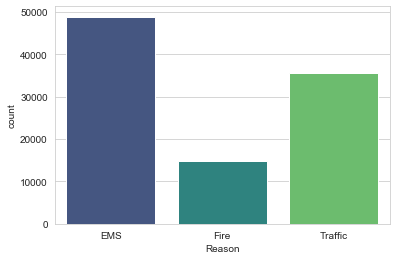

In [17]:
sns.countplot(x='Reason',data=df,palette='viridis')

***Visual 2 : Graphical Analysis of the number of cases found on various days classified on the basis of their category***

Note: This analysis can be used to identify on which week days or in which months are most and least 911 calls made

**Case 1: Weekly analysis**

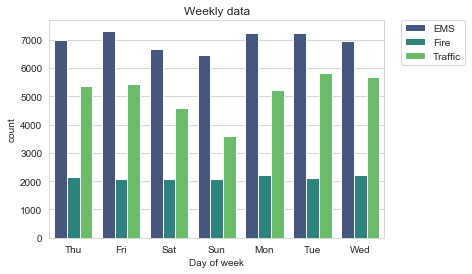

In [18]:
sns.countplot(x='Day of week', data=df,hue='Reason',palette='viridis')
#To set title
plt.title("Weekly data")
#Relocating the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Case 2: Monthly Analysis**

Text(0.5, 1.0, 'Monthly data')

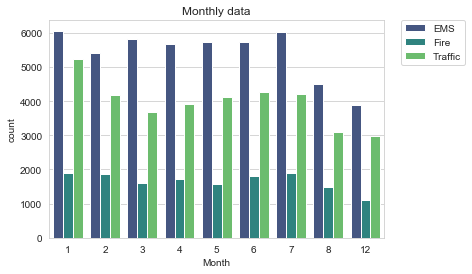

In [19]:
sns.countplot(x='Month', data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Monthly data")

Note: As you can see, *some months are missing!* 
We can compensate this by using a simple line plot that fills in the missing months(moreover estimates those values)

*Grouping the data by 'Month' column*

In [20]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


***Visual 3 : A line graph indicating the count of calls per month.***

Note: This analysis can be used to estimate the calls made during the "missing months"

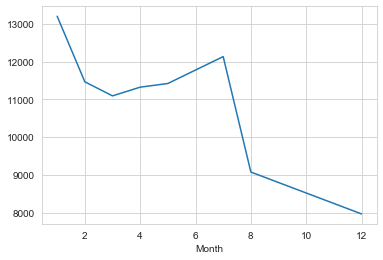

In [21]:
byMonth['twp'].plot()

***Visual 4 : A linear fit on the number of calls per month.***

Note: This analysis estimates the calls made during the "missing months" more accuartely than the previous line graph

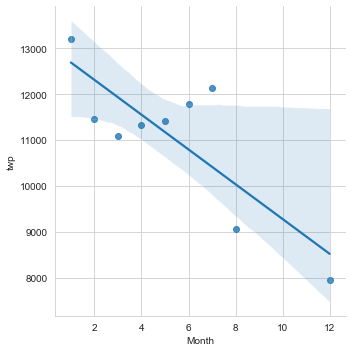

In [22]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

***Visual 5 : Number of calls categorized on the basis of Date of call***

Note: This graph depicts the number of calls made between Dec 2015 and Aug 2016

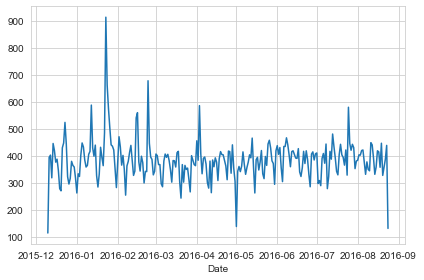

In [23]:
df['Date'] = df['timeStamp'].apply(lambda val: val.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

***Visual 6 : Number of calls made due to 'Traffic' categorized on the basis of Date of call***

Note: This graph depicts the number of calls made due to "Traffic" issue

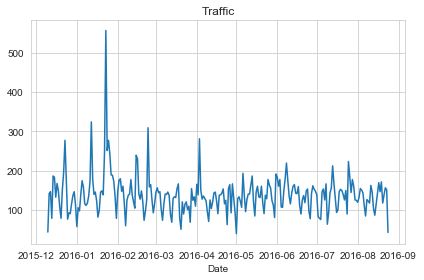

In [24]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

***Visual 7 : Number of calls made due to 'Fire', categorized on the basis of Date of call***

Note: This graph depicts the number of calls made due to "Fire". This analysis can be used to identify the months in which there are maximum/minimum cases of Fire

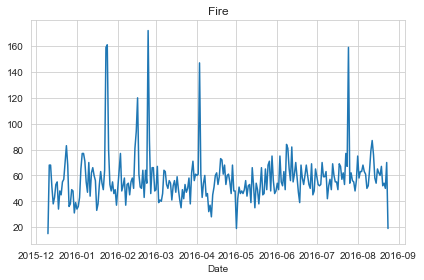

In [25]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

***Visual 8 : Number of calls made due to 'EMS', categorized on the basis of Date of call***

Note: This graph depicts the number of calls made due to "EMS(Medical Emergency)". This analysis can be used to identify the months in which there are maximum/minimum cases of Medical Emergencies

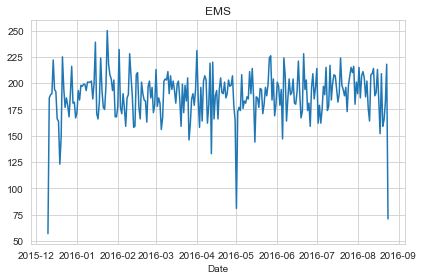

In [26]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
*Creating a matrix between 'Day of week' and 'Hour' of call*

In [27]:
dayHour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


***Visual 9 : Heatmap depicting the "hot" hours during various days of the week***

Note: This heatmap can be used to find that on which day and during what hours are most and least 911 calls made

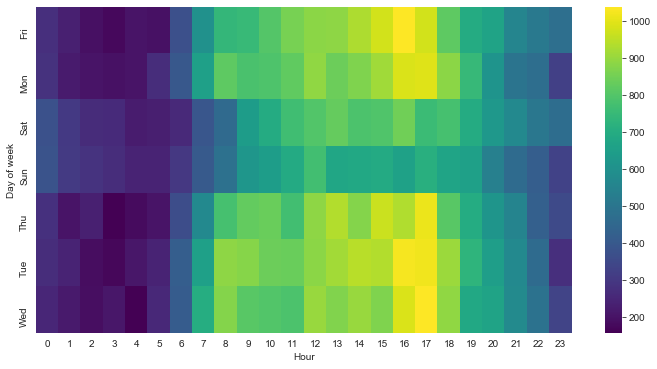

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour,cmap='viridis')

***Visual 10 : Clustermap of the above Heatmap***

Note: This Clustermap categorizes the "hot" and "cold" hours together for easy analysis of the above Heatmap

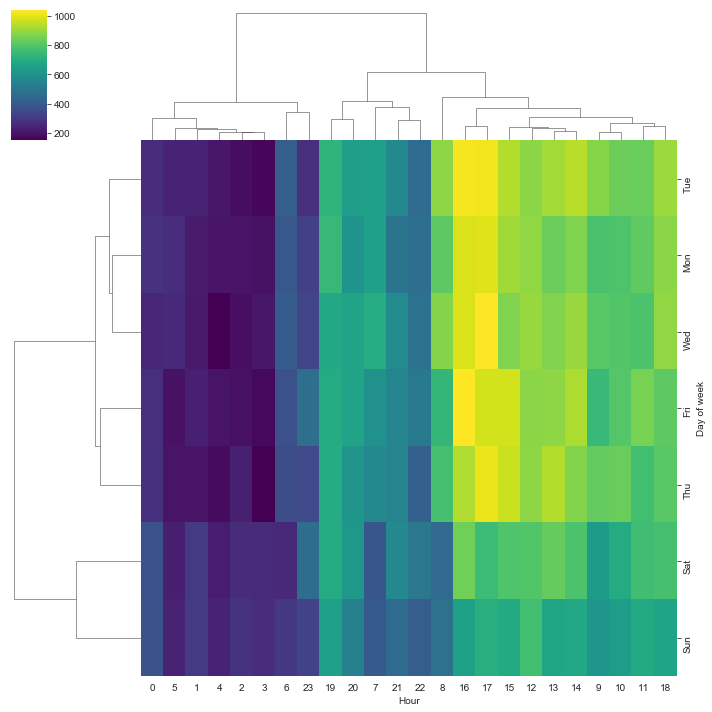

In [29]:
sns.clustermap(data=dayHour,cmap='viridis')

____
*Creating a matrix between 'Day of week' and 'Month' of call*

In [30]:
dayMonth = df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Visual 11 : Heatmap depicting the "hot" months**

Note: This heatmap can be used to find that during which months are most and least 911 calls made

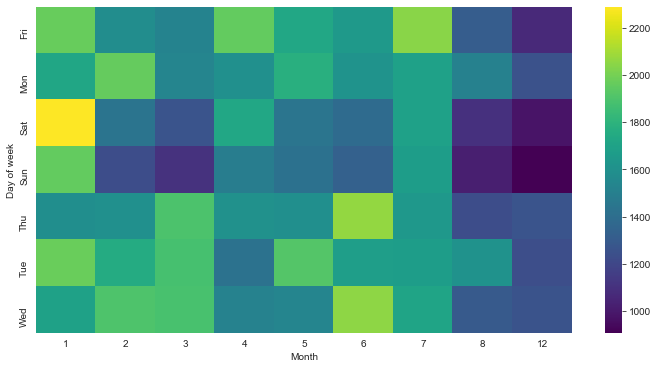

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth,cmap='viridis')

**This project can be used for analysing the data and identifying various trends of 911 calls that a typical user makes**